C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

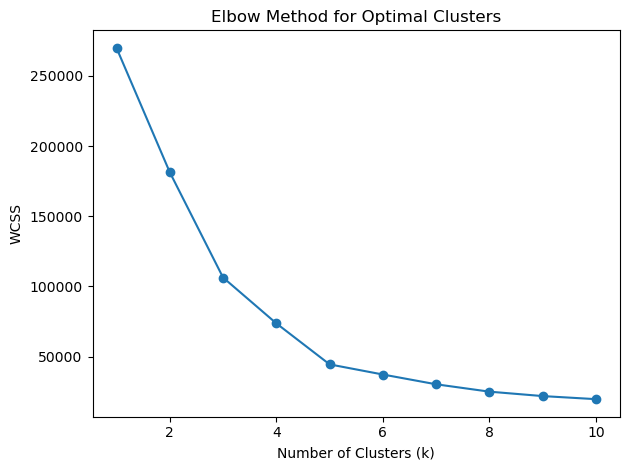

In [4]:
#Name: Taslim Ansari
#UIN: 221P010
#experiment 8: k means clustering <3

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
# Load dataset
df = pd.read_csv("Mall_Customers.csv")
# Select features for clustering
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]
# Calculate WCSS for different numbers of clusters (Elbow Method)
wcss = [KMeans(n_clusters=k, random_state=42).fit(X).inertia_ for k in range(1, 11)]
# Plot WCSS results
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
from tkinter import *
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
from sklearn.cluster import KMeans

# Load and prepare the data
df = pd.read_csv("Mall_Customers.csv")
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]
k_means = KMeans(n_clusters=5, random_state=42).fit(X)
y_pred = k_means.predict(X)

# GUI prediction function
def show_entry_fields():
    p1, p2 = int(e1.get()), int(e2.get())
    cluster = k_means.predict([[p1, p2]])[0]
    Label(master, text=cluster_info[cluster]).grid(row=4)

# Cluster descriptions
cluster_info = {
    0: "Medium income & spending score", 1: "High income & low spending score",
    2: "Low income & low spending score", 3: "Low income & high spending score",
    4: "High income & high spending score"
}

# Create the GUI
master = Tk()
master.title("ML STUDENTS - Customer Segmentation")
Label(master, text="ML STUDENTS LEARNING - Customer Segmentation (ML)", bg="Yellow").grid(row=0, columnspan=2)
Label(master, text="Annual Income").grid(row=1); Label(master, text="Spending Score").grid(row=2)
e1, e2 = Entry(master), Entry(master)
e1.grid(row=1, column=1); e2.grid(row=2, column=1)
Button(master, text='Predict', command=show_entry_fields).grid(row=3)

# Plot clusters
fig = plt.Figure(figsize=(5, 4), dpi=100)
ax = fig.add_subplot(111)
for i in range(5):
    ax.scatter(X.iloc[y_pred == i, 0], X.iloc[y_pred == i, 1], s=100, label=f'Cluster {i}')
ax.set_xlabel('Annual Income (k$)'); ax.set_ylabel('Spending Score (1-100)')
ax.legend(); ax.set_title('Annual Income vs Spending Score')

FigureCanvasTkAgg(fig, master).get_tk_widget().grid(row=5, columnspan=2)
master.mainloop()


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


In [ ]:
import pandas as pd
from tkinter import *
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
from sklearn.cluster import KMeans

# Load data and prepare for clustering
df = pd.read_csv("Placement.csv")
x = df[['cgpa', 'package']]
k_means = KMeans(n_clusters=5, random_state=42).fit(x)
y_mean = k_means.predict(x)

# Function to predict and display cluster info
def show_entry_fields():
    p1, p2 = float(e1.get()), float(e2.get())
    result = k_means.predict([[p1, p2]])[0]

    cluster_info = {
        0: "students with medium CGPA and medium package",
        1: "students with high CGPA and low package",
        2: "students with low CGPA and low package",
        3: "students with low CGPA and high package",
        4: "students with high CGPA and high package"
    }

    # Clear previous label, if any, and display new info
    for widget in master.grid_slaves():
        if int(widget.grid_info()["row"]) >= 4:
            widget.destroy()
    Label(master, text=cluster_info[result]).grid(row=4)
# Create the Tkinter window
master = Tk()
master.title("ML STUDENTS- Student Placement Segmentation")
Label(master, text="Student Placement Segmentation (ML)", bg="Yellow").grid(row=0, columnspan=2)
# Input fields
Label(master, text="CGPA").grid(row=1)
Label(master, text="Package").grid(row=2)
e1, e2 = Entry(master), Entry(master)
e1.grid(row=1, column=1)
e2.grid(row=2, column=1)

# Predict button
Button(master, text='Predict', command=show_entry_fields).grid(row=3)

# Plotting the clusters
figure = plt.Figure(figsize=(5, 4), dpi=100)
ax = figure.add_subplot(111)
for i in range(5):
    ax.scatter(x.iloc[y_mean == i, 0], x.iloc[y_mean == i, 1], s=100, label=f'Cluster {i}')
ax.set_xlabel('CGPA')
ax.set_ylabel('Package')
ax.set_title('CGPA vs Package')
ax.legend()

# Embedding the plot in Tkinter
canvas = FigureCanvasTkAgg(figure, master)
canvas.get_tk_widget().grid(row=5, columnspan=2)

# Start the Tkinter event loop
master.mainloop()
